In [61]:
#Declaring the required libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import make_scorer, f1_score

Logistic Regression F1-score: 0.8999691173914727
SGD Classifier F1-score: 0.8749285594130957
Difference between mean F1-scores of both classifiers: 0.025


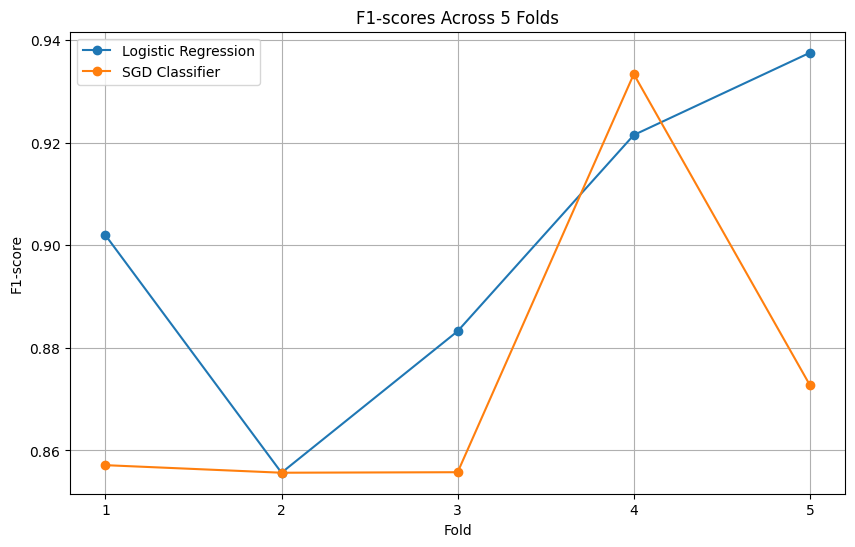

In [62]:
# Set seed for reproducibility
np.random.seed(42)

# Generating a dataset using make_classification() generator
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.0, random_state=42)

# Create F1 scorer
f1_scorer = make_scorer(f1_score)

# Initialize classifiers
logistic_regression = LogisticRegression(random_state=42)
sgd_classifier = SGDClassifier(random_state=42)

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate classifiers using 5-fold cross-validation with F1-score
f1_scores_lr = cross_val_score(logistic_regression, X, y, cv=cv, scoring=f1_scorer)
f1_scores_sgd = cross_val_score(sgd_classifier, X, y, cv=cv, scoring=f1_scorer)

# Print F1-scores
print(f"Logistic Regression F1-score: {np.mean(f1_scores_lr)}")
print(f"SGD Classifier F1-score: {np.mean(f1_scores_sgd)}")

#Difference between mean F1-scores for both classifiers
print(f"Difference between mean F1-scores of both classifiers: {round(abs(np.mean(f1_scores_lr)-np.mean(f1_scores_sgd)),4)}")

# Plot F1-scores across 5 folds for both classifiers
plt.figure(figsize=(10, 6))

plt.plot(np.arange(1, 6), f1_scores_lr, marker='o', label='Logistic Regression')
plt.plot(np.arange(1, 6), f1_scores_sgd, marker='o', label='SGD Classifier')

plt.title('F1-scores Across 5 Folds')
plt.xlabel('Fold')
plt.ylabel('F1-score')
plt.xticks(np.arange(1, 6))
plt.legend()
plt.grid(True)
plt.show()


Logistic Regression F1-score: 0.5940106166739152
SGD Classifier F1-score: 0.6270678018601751
Difference between mean F1-scores of both classifiers: 0.0331


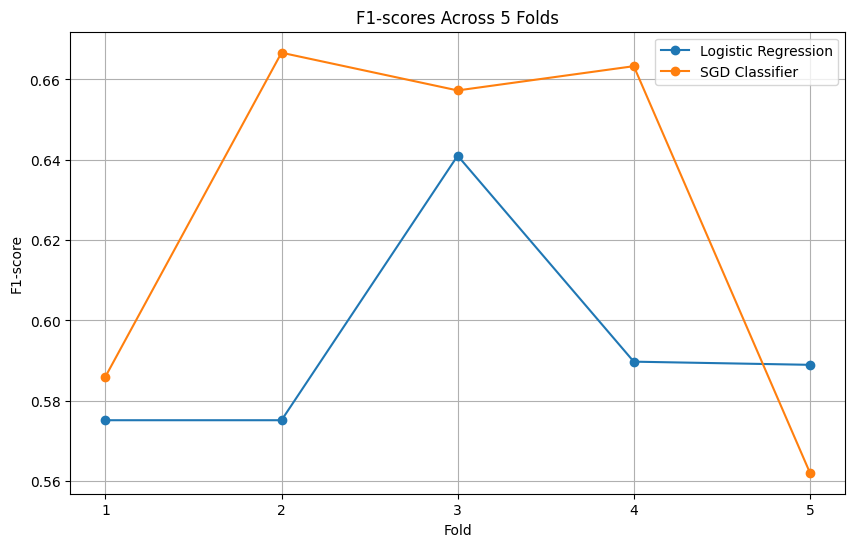

In [63]:
# Setting seed for reproducibility
np.random.seed(42)

# Generating a dataset using make_classification() generator
X, y = make_classification(n_samples=800, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.375, flip_y=0.2, random_state=42)

# Initializing F1 scorer
f1_scorer = make_scorer(f1_score)

# Initializing classifiers
logistic_regression = LogisticRegression(random_state=42)
sgd_classifier = SGDClassifier(random_state=42)

# Setting up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating classifiers using 5-fold cross-validation with F1-score
f1_scores_lr = cross_val_score(logistic_regression, X, y, cv=cv, scoring=f1_scorer)
f1_scores_sgd = cross_val_score(sgd_classifier, X, y, cv=cv, scoring=f1_scorer)

# Printing F1-scores
print(f"Logistic Regression F1-score: {np.mean(f1_scores_lr)}")
print(f"SGD Classifier F1-score: {np.mean(f1_scores_sgd)}")

#Difference between mean F1-scores for both classifiers
print(f"Difference between mean F1-scores of both classifiers: {round(abs(np.mean(f1_scores_lr)-np.mean(f1_scores_sgd)),4)}")

# Plotting F1-scores across 5 folds for both classifiers
plt.figure(figsize=(10, 6))

plt.plot(np.arange(1, 6), f1_scores_lr, marker='o', label='Logistic Regression')
plt.plot(np.arange(1, 6), f1_scores_sgd, marker='o', label='SGD Classifier')

plt.title('F1-scores Across 5 Folds')
plt.xlabel('Fold')
plt.ylabel('F1-score')
plt.xticks(np.arange(1, 6))
plt.legend()
plt.grid(True)
plt.show()

### Insights

* Both classifiers, SGD and Logistic Regression, achieved comparatively same F1-scores, indicating decent performance on both dataset generated using make_classifier() generator.

* <ins>__Dataset 1__ </ins>: The logistic regression classifier slightly outperformed the SGD classifier for this dataset since the class separation was high for this dataset. When classes are well-separated, a linear decision boundary can effectively discriminate between the classes. Whereas, SGD is a more flexible optimization algorithm that can handle non-linear decision boundaries. If there is a higher degree of class separation, and the classes are well-separated, SGD might be more sensitive to noise in the data. The noisy samples can influence the optimization process, potentially leading to suboptimal solutions.

* <ins> __Dataset 2__ </ins>: The SGD classifier performed slightly better than logistic regression classifier for this dataset. In this dataset, noise was introduced and class separation was kept low. Since, SGD has more flexibility in learning complex and non-linear decision boundaries, the data may exhibit a more complex structure that SGD can potentially capture better than a linear model like Logistic Regression.